In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as datasets

In [2]:
mean_gray = 0.1307
stddev_gray = 0.3081

# input[channel] = (input[channel]-meaan[channel]) / std[channel]

transforms = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((mean_gray,),(stddev_gray,))])

train_dataset = datasets.MNIST(root='./data', 
                               train=True, 
                               transform=transforms, 
                               download=True)

test_dataset = datasets.MNIST(root='./data', 
                               train=False, 
                               transform=transforms)

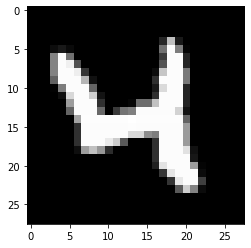

In [3]:
import matplotlib.pyplot as plt
random_img = train_dataset[20][0].numpy() * stddev_gray + mean_gray
plt.imshow(random_img.reshape(28,28), cmap='gray')

In [4]:
print(train_dataset[20][1])

4


In [5]:
batch_size = 100

train_load = torch.utils.data.DataLoader(dataset=train_dataset,
                                        batch_size=batch_size,
                                        shuffle=True)

test_load = torch.utils.data.DataLoader(dataset=test_dataset,
                                        batch_size=batch_size,
                                        shuffle=True)


In [6]:
len(test_load)

100

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        # Same padding means that input_size = output_size
        # same_padding = (filter_size - 1) / 2
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=(3,3), stride=1, padding=1)
        # The output from this layer has size:
        # [(input_size - filter_size + 2*(padding)) / stride] + 1
        self.batchnorm1 = nn.BatchNorm2d(8)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=(2,2))
        # Pooling output size is 28/2 = 14 (downsampling)
        # Same padding size is (5 - 1)/2 = 2
        self.cnn2 = nn.Conv2d(in_channels=8, out_channels=32, kernel_size=(5,5), stride=1, padding=2)
        self.batchnorm2 = nn.BatchNorm2d(32)
        # Pooling output size is 14/2 = 7 (downsampling)
        # We have to flatten the output channels 32*7*7 = 1568
        self.fc1 = nn.Linear(1568,600)
        self.dropout = nn.Dropout(p=0.5)
        self.fc2 = nn.Linear(600,10)
        
    def forward(self,x):
        out = self.cnn1(x)
        out = self.batchnorm1(out)
        out = self.relu(out)
        out = self.maxpool(out)
        out = self.cnn2(out)
        out = self.batchnorm2(out)
        out = self.relu(out)
        out = self.maxpool(out)
        # we have to flatten the 32 feature maps, output of our last maxpool (100, 1568)
        out = out.view(batch_size, 1568)
        out = self.fc1(out)
        out = self.relu(out)
        out = self.dropout(out)
        out = self.fc2(out)
        
        return out
        